In [1]:
import cv2
import os

In [2]:
from PIL import Image

# File Name Cutting & Size Unification

fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((256, 256))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated256/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

fileList = os.listdir('./ImageSizeUnificated256/')

for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated256/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages256/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [5]:
filenames = os.listdir("./grayImages256/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
        
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

In [6]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
1,3001(2).png,3001
2,3001(3).png,3001
3,3001(4).png,3001
4,3001(5).png,3001
...,...,...
2111,6022(2).png,6022
2110,6022(10).png,6022
2109,6022(1).png,6022
2112,6022(3).png,6022


# -------------------------------------------------------------------------------------------------------

# Label Count

In [40]:
len(df['category'].unique())

258

# -------------------------------------------------------------------------------------------------------

5023(5).png


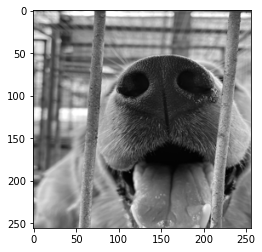

In [7]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages256/"+sample)
plt.imshow(image)

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data

In [8]:
train_target = np.array(df['category'])

In [9]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [10]:
train_target = train_target.astype('uint8')

In [11]:
train_target

array([185, 185, 185, ..., 134, 134, 134], dtype=uint8)

In [12]:
print('dtype : ' ,train_target.dtype)
print('type : ', type(train_target))
print('shape : ', train_target.shape)
print('unique : ', np.unique(train_target, return_counts=True))

dtype :  uint8
type :  <class 'numpy.ndarray'>
shape :  (2119,)
unique :  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8), array([ 9, 35, 10, 24,  6, 15,  4, 17, 18, 15,  3, 13,  

# -------------------------------------------------------------------------------------------------------

# 1개 짜리 데이터 삭제
## 삭제 대상

In [ ]:
deleteTarget = []

targetNumber = (np.unique(train_target, return_counts=True))[0]
countes = (np.unique(train_target, return_counts=True))[1]

for i in range(0, len(countes)):
    if countes[i] == 1:
        deleteTarget.append(targetNumber[i])

print(deleteTarget)

## 삭제

In [ ]:
for i in range(0, len(countes)):
    if countes[i] == 1:
        if os.path.isfile('./grayImages256/' + targetNumber[i] + '(1).png'):
            os.remove('./grayImages256/' + targetNumber[i] + '(1).png')

In [33]:
fileList = os.listdir('./grayImages256/')
totalFileCount = 0
for file in fileList:
    totalFileCount += 1
    
print(totalFileCount)

2119


# -------------------------------------------------------------------------------------------------------

# train input data

In [13]:
train_input = []

In [14]:
filenames = os.listdir("./grayImages256/")
for filename in filenames:
#     plt.imshow(np.array(Image.open('./trainData/' + filename)))
    train_input.append( np.array(Image.open('./grayImages256/' + filename)) )

In [15]:
train_input = np.array(train_input)

In [16]:
train_input

array([[[ 58,  56,  59, ...,  68,  71,  70],
        [ 58,  58,  59, ...,  70,  72,  73],
        [ 57,  59,  60, ...,  71,  72,  73],
        ...,
        [199, 204, 206, ...,  86,  83,  84],
        [150, 155, 166, ...,  86,  86,  83],
        [215, 203, 188, ...,  86,  86,  87]],

       [[ 58,  56,  59, ...,  68,  71,  70],
        [ 58,  58,  59, ...,  70,  72,  73],
        [ 57,  59,  60, ...,  71,  72,  73],
        ...,
        [199, 204, 206, ...,  86,  83,  84],
        [150, 155, 166, ...,  86,  86,  83],
        [215, 203, 188, ...,  86,  86,  87]],

       [[ 54,  53,  53, ...,  68,  70,  72],
        [ 54,  53,  52, ...,  71,  71,  72],
        [ 54,  53,  53, ...,  72,  72,  73],
        ...,
        [ 99,  99, 100, ..., 120, 124, 126],
        [ 97,  96,  97, ..., 118, 118, 118],
        [109, 102, 101, ..., 114, 115, 111]],

       ...,

       [[ 90,  90,  92, ...,  93,  94,  97],
        [ 85,  92,  77, ...,  94,  94,  97],
        [ 60,  50,  40, ...,  95,  94,  97

In [17]:
print(train_input.shape)

(2119, 256, 256)


# -------------------------------------------------------------------------------------------------------

# Data Normalization

# ********************************

In [18]:
train_scaled = train_input.reshape(-1, 256, 256, 1) / 255.0

In [19]:
print(train_scaled.shape)

(2119, 256, 256, 1)


# CV

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print('성능 : {:.2f}%'.format(np.mean(scores['test_score']*100)))

# Data Split

In [20]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(1695, 256, 256, 1) (1695,)
(424, 256, 256, 1) (424,)


# -------------------------------------------------------------------------------------------------------

# Learn

import tensorflow as tf
from tensorflow import keras

dense = keras.layers.Dense(units=1, activation='softmax', input_shape=(784,))

model = keras.Sequential(dense)

model.compile(loss='categoraical_crossentropy', metrics='accuracy')

print(train_scaled.shape)
print(train_target.shape)

model.fit(train_scaled, train_target, epochs=10)

# Performance

model.evaluate(val_scaled, val_target)

# CNN

In [22]:
from tensorflow import keras

In [41]:
model_CNN = keras.Sequential()

# ************ breakpoint ************

In [42]:
model_CNN.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(256, 256, 1)))

In [43]:
model_CNN.add(keras.layers.MaxPooling2D(2))

In [44]:
model_CNN.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

In [45]:
model_CNN.add(keras.layers.MaxPooling2D(2))

In [46]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(100, activation='relu'))
model_CNN.add(keras.layers.Dropout(0.4))
model_CNN.add(keras.layers.Dense(258, activation='softmax'))

# ************ breakpoint ************

In [47]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [51]:
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model_CNN.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
53/53 [==============================] - 65s 1s/step - loss: 5.1953 - accuracy: 0.0171 - val_loss: 5.0300 - val_accuracy: 0.0189
Epoch 2/20
53/53 [==============================] - 59s 1s/step - loss: 4.7490 - accuracy: 0.0490 - val_loss: 4.7132 - val_accuracy: 0.1108
Epoch 3/20
53/53 [==============================] - 64s 1s/step - loss: 4.1068 - accuracy: 0.1221 - val_loss: 4.3998 - val_accuracy: 0.1675
Epoch 4/20
53/53 [==============================] - 61s 1s/step - loss: 3.4814 - accuracy: 0.1994 - val_loss: 4.2034 - val_accuracy: 0.2170
Epoch 5/20
53/53 [==============================] - 60s 1s/step - loss: 2.8218 - accuracy: 0.2926 - val_loss: 4.1209 - val_accuracy: 0.2524
Epoch 6/20
53/53 [==============================] - 61s 1s/step - loss: 2.3689 - accuracy: 0.3994 - val_loss: 4.0176 - val_accuracy: 0.2642
Epoch 7/20
53/53 [==============================] - 60s 1s/step - loss: 2.1245 - accuracy: 0.4319 - val_loss: 4.5132 - val_accuracy: 0.2476
Epoch 8/20
53/53 [==

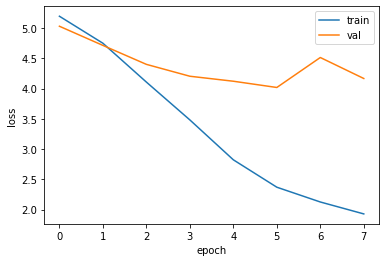

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [55]:
model_CNN.evaluate(val_scaled, val_target)

14/14 [==============================] - 3s 245ms/step - loss: 4.0176 - accuracy: 0.2642


[4.017634391784668, 0.2641509473323822]